In [1]:
#Q1 Implement a basic convolution operation using a filter and a 5x5 image (matrix).
import numpy as np

# Define a 5x5 image (matrix)
image = np.array([[1, 2, 3, 0, 1],
                  [0, 1, 2, 3, 0],
                  [1, 0, 1, 2, 1],
                  [2, 1, 0, 1, 2],
                  [0, 2, 3, 1, 0]])

# Define a simple 3x3 filter (kernel)
filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

def convolution2d(image, filter):
    # Get dimensions
    image_height, image_width = image.shape
    filter_height, filter_width = filter.shape
    
    # Calculate output dimensions
    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1
    
    # Initialize output matrix
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of interest
            region = image[i:i+filter_height, j:j+filter_width]
            # Perform element-wise multiplication and sum
            output[i][j] = np.sum(region * filter)
    
    return output

# Call the convolution function and print the result
output_image = convolution2d(image, filter)
print("Output of Convolution:\n", output_image)



Output of Convolution:
 [[-4. -2.  4.]
 [ 0. -4.  0.]
 [-1. -1.  1.]]


In [2]:
#Q2  Implement max pooling on a 4x4 feature map with a 2x2 window.

import numpy as np

# Define a 4x4 feature map
feature_map = np.array([[1, 3, 2, 4],
                         [5, 6, 1, 0],
                         [9, 8, 7, 3],
                         [2, 1, 0, 5]])

def max_pooling(feature_map, pool_size):
    # Get dimensions
    feature_height, feature_width = feature_map.shape
    pool_height, pool_width = pool_size
    
    # Calculate output dimensions
    output_height = feature_height // pool_height
    output_width = feature_width // pool_width
    
    # Initialize output matrix
    output = np.zeros((output_height, output_width))
    
    # Perform max pooling
    for i in range(output_height):
        for j in range(output_width):
            # Define the current window
            window = feature_map[i*pool_height:(i+1)*pool_height,
                                 j*pool_width:(j+1)*pool_width]
            # Get the maximum value in the window
            output[i][j] = np.max(window)
    
    return output

# Define the pooling size (2x2)
pool_size = (2, 2)

# Call the max pooling function and print the result
pooled_output = max_pooling(feature_map, pool_size)
print("Output of Max Pooling:\n", pooled_output)


Output of Max Pooling:
 [[6. 4.]
 [9. 7.]]


In [3]:
#Q3 Implement the ReLU activation function on a feature map.

import numpy as np

# Define a sample feature map (4x4 matrix)
feature_map = np.array([[1, -2, 3, -4],
                         [-1, 2, -3, 4],
                         [5, -6, 7, -8],
                         [-9, 10, -11, 12]])

def relu(x):
    """Apply ReLU activation function."""
    return np.maximum(0, x)

# Apply the ReLU function to the feature map
relu_output = relu(feature_map)

# Print the output of ReLU activation
print("Output of ReLU Activation:\n", relu_output)



Output of ReLU Activation:
 [[ 1  0  3  0]
 [ 0  2  0  4]
 [ 5  0  7  0]
 [ 0 10  0 12]]


In [4]:
#Q4 Create a simple CNN model with one convolutional layer and a fully connected layer, using random data.

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate random data
# Let's create a batch of 10 images, each of size 28x28 with 1 channel (grayscale)
num_samples = 10
image_height = 28
image_width = 28
num_channels = 1  # Grayscale images
num_classes = 10  # For example, 10 classes for classification

# Random input data (images)
X_train = np.random.rand(num_samples, image_height, image_width, num_channels).astype(np.float32)

# Random labels (one-hot encoded)
y_train = np.random.randint(0, num_classes, num_samples)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

# Define the CNN model
model = models.Sequential()

# Add a convolutional layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model on the random data (for demonstration purposes)
model.fit(X_train, y_train, epochs=5)

# Evaluate the model on the same random data (not meaningful but for demonstration)
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Loss: {loss}, Accuracy: {accuracy}")


C:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         173,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,930 (679.41 KB)

 Trainable params: 173,930 (679.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1000 - loss: 2.2581
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4000 - loss: 1.9761
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3000 - loss: 1.8675
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3000 - loss: 1.7864
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3000 - loss: 1.6987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3000 - loss: 1.6086
Loss: 1.6086393594741821, Accuracy: 0.30000001192092896


C:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0840 - loss: 2.3196 - val_accuracy: 0.1300 - val_loss: 2.3075
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1070 - loss: 2.2966 - val_accuracy: 0.1400 - val_loss: 2.3077
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1278 - loss: 2.2932 - val_accuracy: 0.1100 - val_loss: 2.3126
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1436 - loss: 2.2905 - val_accuracy: 0.1250 - val_loss: 2.3096
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1227 - loss: 2.2846 - val_accuracy: 0.1300 - val_loss: 2.3124
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1526 - loss: 2.2756 - val_accuracy: 0.1150 - val_loss: 2.3151
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1698 - loss: 2.2655 - val_accuracy: 0.1100 - val_loss: 2.3253
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1507 - loss: 2.2529 - val_accuracy: 0.1200 - val_loss

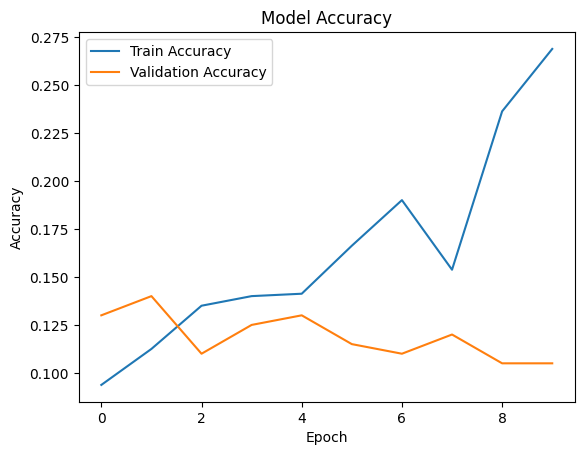

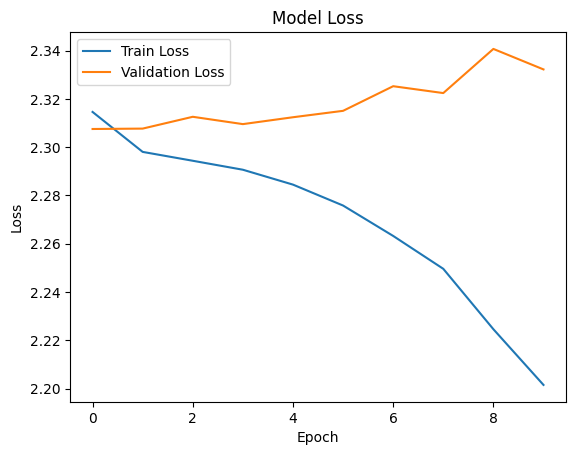

In [5]:
#Q5 Generate a synthetic dataset using random noise and train a simple CNN model on it.

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic dataset
def generate_synthetic_data(num_samples, image_height, image_width, num_classes):
    # Create random noise images
    X = np.random.rand(num_samples, image_height, image_width, 1).astype(np.float32)
    
    # Create random labels (one-hot encoded)
    y = np.random.randint(0, num_classes, num_samples)
    y = tf.keras.utils.to_categorical(y, num_classes)
    
    return X, y

# Parameters
num_samples = 1000  # Total number of samples
image_height = 28   # Height of each image
image_width = 28    # Width of each image
num_classes = 10    # Number of classes for classification

# Generate the synthetic dataset
X_train, y_train = generate_synthetic_data(num_samples, image_height, image_width, num_classes)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model on the synthetic data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the training data (for demonstration purposes)
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          27,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1125 - loss: 2.3775 - val_accuracy: 0.1150 - val_loss: 2.3493
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1158 - loss: 2.3081 - val_accuracy: 0.1000 - val_loss: 2.3274
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1740 - loss: 2.2582 - val_accuracy: 0.1100 - val_loss: 2.3287
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2552 - loss: 2.2117 - val_accuracy: 0.1150 - val_loss: 2.3331
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3426 - loss: 2.1613 - val_accuracy: 0.1150 - val_loss: 2.3389
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4186 - loss: 2.0977 - val_accuracy: 0.1100 - val_loss: 2.3449
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4736 - loss: 2.0246 - val_accuracy: 0.1100 - val_loss: 2.3556
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5394 - loss: 1.9388 - val_accuracy: 0.1150 - val_loss

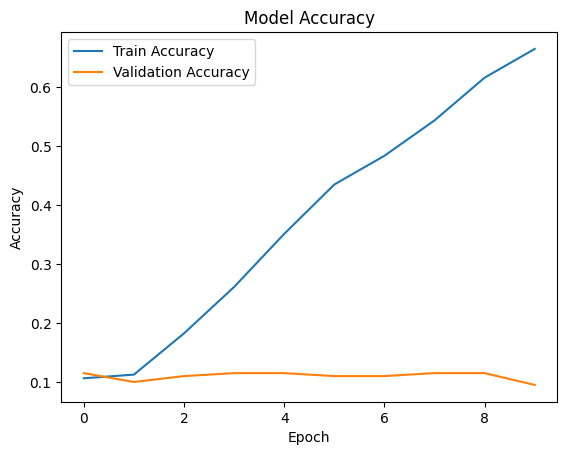

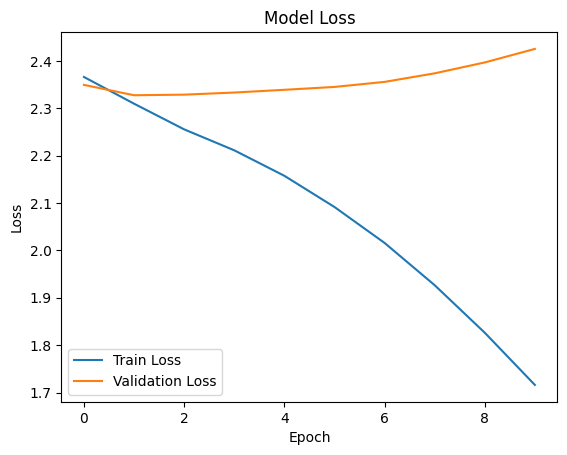

In [6]:
#Q6 Create a simple CNN using Keras with one convolution layer and a max-pooling layer.

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic dataset
def generate_synthetic_data(num_samples, image_height, image_width, num_classes):
    # Create random noise images
    X = np.random.rand(num_samples, image_height, image_width, 1).astype(np.float32)
    
    # Create random labels (one-hot encoded)
    y = np.random.randint(0, num_classes, num_samples)
    y = tf.keras.utils.to_categorical(y, num_classes)
    
    return X, y

# Parameters
num_samples = 1000  # Total number of samples
image_height = 28   # Height of each image
image_width = 28    # Width of each image
num_classes = 10    # Number of classes for classification

# Generate the synthetic dataset
X_train, y_train = generate_synthetic_data(num_samples, image_height, image_width, num_classes)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model on the synthetic data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the training data (for demonstration purposes)
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [7]:
#Q8 Write a code to add a fully connected layer after the convolution and max-pooling layers in a CNN.

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic dataset
def generate_synthetic_data(num_samples, image_height, image_width, num_classes):
    # Create random noise images
    X = np.random.rand(num_samples, image_height, image_width, 1).astype(np.float32)
    
    # Create random labels (one-hot encoded)
    y = np.random.randint(0, num_classes, num_samples)
    y = tf.keras.utils.to_categorical(y, num_classes)
    
    return X, y

# Parameters
num_samples = 1000  # Total number of samples
image_height = 28   # Height of each image
image_width = 28    # Width of each image
num_classes = 10    # Number of classes for classification

# Generate the synthetic dataset
X_train, y_train = generate_synthetic_data(num_samples, image_height, image_width, num_classes)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())  # Flatten the output from the convolutional layer
model.add(layers.Dense(64, activation='relu'))  # Fully connected layer with 64 units
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model on the synthetic data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the training data (for demonstration purposes)
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │         173,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,930 (679.41 KB)

 Trainable params: 173,930 (679.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0946 - loss: 2.3361 - val_accuracy: 0.1200 - val_loss: 2.3155
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1403 - loss: 2.2926 - val_accuracy: 0.0750 - val_loss: 2.3161
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1372 - loss: 2.2793 - val_accuracy: 0.1450 - val_loss: 2.3099
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1655 - loss: 2.2591 - val_accuracy: 0.1450 - val_loss: 2.3156
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1737 - loss: 2.2383 - val_accuracy: 0.1300 - val_loss: 2.3177
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2120 - loss: 2.2098 - val_accuracy: 0.1000 - val_loss: 2.3216
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2387 - loss: 2.1762 - val_accuracy: 0.1000 - val_loss: 2.3260
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2730 - loss: 2.1355 - val_accuracy: 0.1000 - val_loss:

In [8]:
#Q8 Write a code to add  batch normalization to a simple CNN mode.


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic dataset
def generate_synthetic_data(num_samples, image_height, image_width, num_classes):
    # Create random noise images
    X = np.random.rand(num_samples, image_height, image_width, 1).astype(np.float32)
    
    # Create random labels (one-hot encoded)
    y = np.random.randint(0, num_classes, num_samples)
    y = tf.keras.utils.to_categorical(y, num_classes)
    
    return X, y

# Parameters
num_samples = 1000  # Total number of samples
image_height = 28   # Height of each image
image_width = 28    # Width of each image
num_classes = 10    # Number of classes for classification

# Generate the synthetic dataset
X_train, y_train = generate_synthetic_data(num_samples, image_height, image_width, num_classes)

# Define the CNN model with Batch Normalization
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), input_shape=(image_height, image_width, 1)))
model.add(layers.BatchNormalization())  # Add Batch Normalization layer
model.add(layers.Activation('relu'))     # Activation after normalization
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())               # Flatten the output from the convolutional layer
model.add(layers.Dense(64, activation='relu'))  # Fully connected layer with 64 units
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model on the synthetic data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the training data (for demonstration purposes)
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Loss: {loss}, Accuracy: {accuracy}")



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │         173,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,994 (679.66 KB)

 Trainable params: 173,962 (679.54 KB)

 Non-trainable params: 32 (128.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0867 - loss: 3.2439 - val_accuracy: 0.0750 - val_loss: 2.3132
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1646 - loss: 2.2643 - val_accuracy: 0.0950 - val_loss: 2.3137
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1890 - loss: 2.1696 - val_accuracy: 0.0950 - val_loss: 2.3117
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2571 - loss: 2.0589 - val_accuracy: 0.0850 - val_loss: 2.3142
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3443 - loss: 1.9180 - val_accuracy: 0.0800 - val_loss: 2.3209
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4520 - loss: 1.7789 - val_accuracy: 0.0700 - val_loss: 2.3254
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5365 - loss: 1.6493 - val_accuracy: 0.0700 - val_loss: 2.3329
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5919 - loss: 1.5318 - val_accuracy: 0.0900 - val_los

In [9]:
#Q9 Write a code to add dropout regularization to a simple CNN mode|

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic dataset
def generate_synthetic_data(num_samples, image_height, image_width, num_classes):
    # Create random noise images
    X = np.random.rand(num_samples, image_height, image_width, 1).astype(np.float32)
    
    # Create random labels (one-hot encoded)
    y = np.random.randint(0, num_classes, num_samples)
    y = tf.keras.utils.to_categorical(y, num_classes)
    
    return X, y

# Parameters
num_samples = 1000  # Total number of samples
image_height = 28   # Height of each image
image_width = 28    # Width of each image
num_classes = 10    # Number of classes for classification

# Generate the synthetic dataset
X_train, y_train = generate_synthetic_data(num_samples, image_height, image_width, num_classes)

# Define the CNN model with Dropout regularization
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())               # Flatten the output from the convolutional layer
model.add(layers.Dense(64, activation='relu'))  # Fully connected layer with 64 units
model.add(layers.Dropout(0.5))           # Dropout layer with a rate of 50%
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model on the synthetic data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the training data (for demonstration purposes)
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Loss: {loss}, Accuracy: {accuracy}")



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │         173,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,930 (679.41 KB)

 Trainable params: 173,930 (679.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0775 - loss: 2.3969 - val_accuracy: 0.0700 - val_loss: 2.3215
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0789 - loss: 2.3059 - val_accuracy: 0.0750 - val_loss: 2.3090
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0931 - loss: 2.3020 - val_accuracy: 0.0950 - val_loss: 2.3048
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1382 - loss: 2.2955 - val_accuracy: 0.1000 - val_loss: 2.3057
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1409 - loss: 2.2881 - val_accuracy: 0.1200 - val_loss: 2.3061
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1167 - loss: 2.2906 - val_accuracy: 0.0800 - val_loss: 2.3125
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1254 - loss: 2.2853 - val_accuracy: 0.0800 - val_loss: 2.3216
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1313 - loss: 2.2837 - val_accuracy: 0.0850 - val_loss

In [10]:
#Q10 Write a code to print the architecture of the VGG16 model in Keras*

import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Instantiate the VGG16 model
model = VGG16(weights='imagenet', include_top=True)  # include_top=True includes the fully connected layers

# Print the model architecture
model.summary()


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 90s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0933 - loss: 2.3959 - val_accuracy: 0.0750 - val_loss: 2.3370
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1205 - loss: 2.3042 - val_accuracy: 0.0800 - val_loss: 2.3101
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1281 - loss: 2.2950 - val_accuracy: 0.0850 - val_loss: 2.3235
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1289 - loss: 2.2923 - val_accuracy: 0.0800 - val_loss: 2.3218
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1362 - loss: 2.2808 - val_accuracy: 0.0900 - val_loss: 2.3220
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1736 - loss: 2.2689 - val_accuracy: 0.0800 - val_loss: 2.3331
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1377 - loss: 2.2511 - val_accuracy: 0.0750 - val_loss: 2.3239
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2546 - loss: 2.2374 - val_accuracy: 0.0850 - val_loss

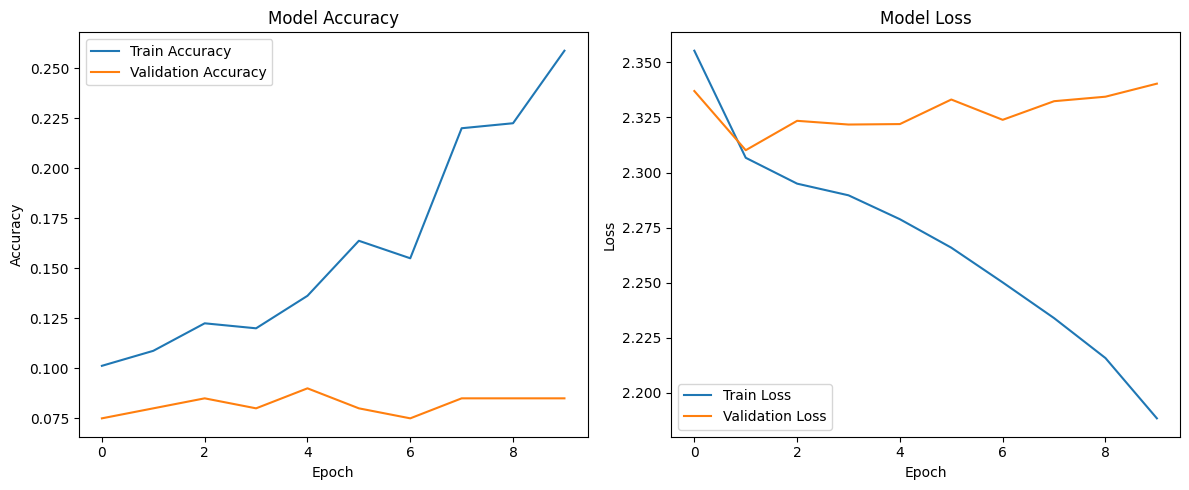

In [11]:
#Q11 Write a code to plot the accuracy and loss graphs after training a CNN model.

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic dataset
def generate_synthetic_data(num_samples, image_height, image_width, num_classes):
    # Create random noise images
    X = np.random.rand(num_samples, image_height, image_width, 1).astype(np.float32)
    
    # Create random labels (one-hot encoded)
    y = np.random.randint(0, num_classes, num_samples)
    y = tf.keras.utils.to_categorical(y, num_classes)
    
    return X, y

# Parameters
num_samples = 1000  # Total number of samples
image_height = 28   # Height of each image
image_width = 28    # Width of each image
num_classes = 10    # Number of classes for classification

# Generate the synthetic dataset
X_train, y_train = generate_synthetic_data(num_samples, image_height, image_width, num_classes)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the synthetic data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [12]:
#Q12 Write a code to print the architecture of the ResNet50 model in Keras?

import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# Instantiate the ResNet50 model
model = ResNet50(weights='imagenet', include_top=True)  # include_top=True includes the fully connected layers

# Print the model architecture
model.summary()


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
#Q13 Write a code to train a basic CNN model and print the training loss and accuracy after each epoch?


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic dataset
def generate_synthetic_data(num_samples, image_height, image_width, num_classes):
    # Create random noise images
    X = np.random.rand(num_samples, image_height, image_width, 1).astype(np.float32)
    
    # Create random labels (one-hot encoded)
    y = np.random.randint(0, num_classes, num_samples)
    y = tf.keras.utils.to_categorical(y, num_classes)
    
    return X, y

# Parameters
num_samples = 1000  # Total number of samples
image_height = 28   # Height of each image
image_width = 28    # Width of each image
num_classes = 10    # Number of classes for classification

# Generate the synthetic dataset
X_train, y_train = generate_synthetic_data(num_samples, image_height, image_width, num_classes)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and print training loss and accuracy after each epoch
epochs = 10
batch_size = 32

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0)  # Train for one epoch at a time
    train_loss = history.history['loss'][0]
    train_accuracy = history.history['accuracy'][0]
